In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
stockdata_df = pd.read_csv("Stockdataset.csv")
stockdata_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
stockdata_df.shape

(2035, 8)

In [4]:
stockdata_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
stockdata_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

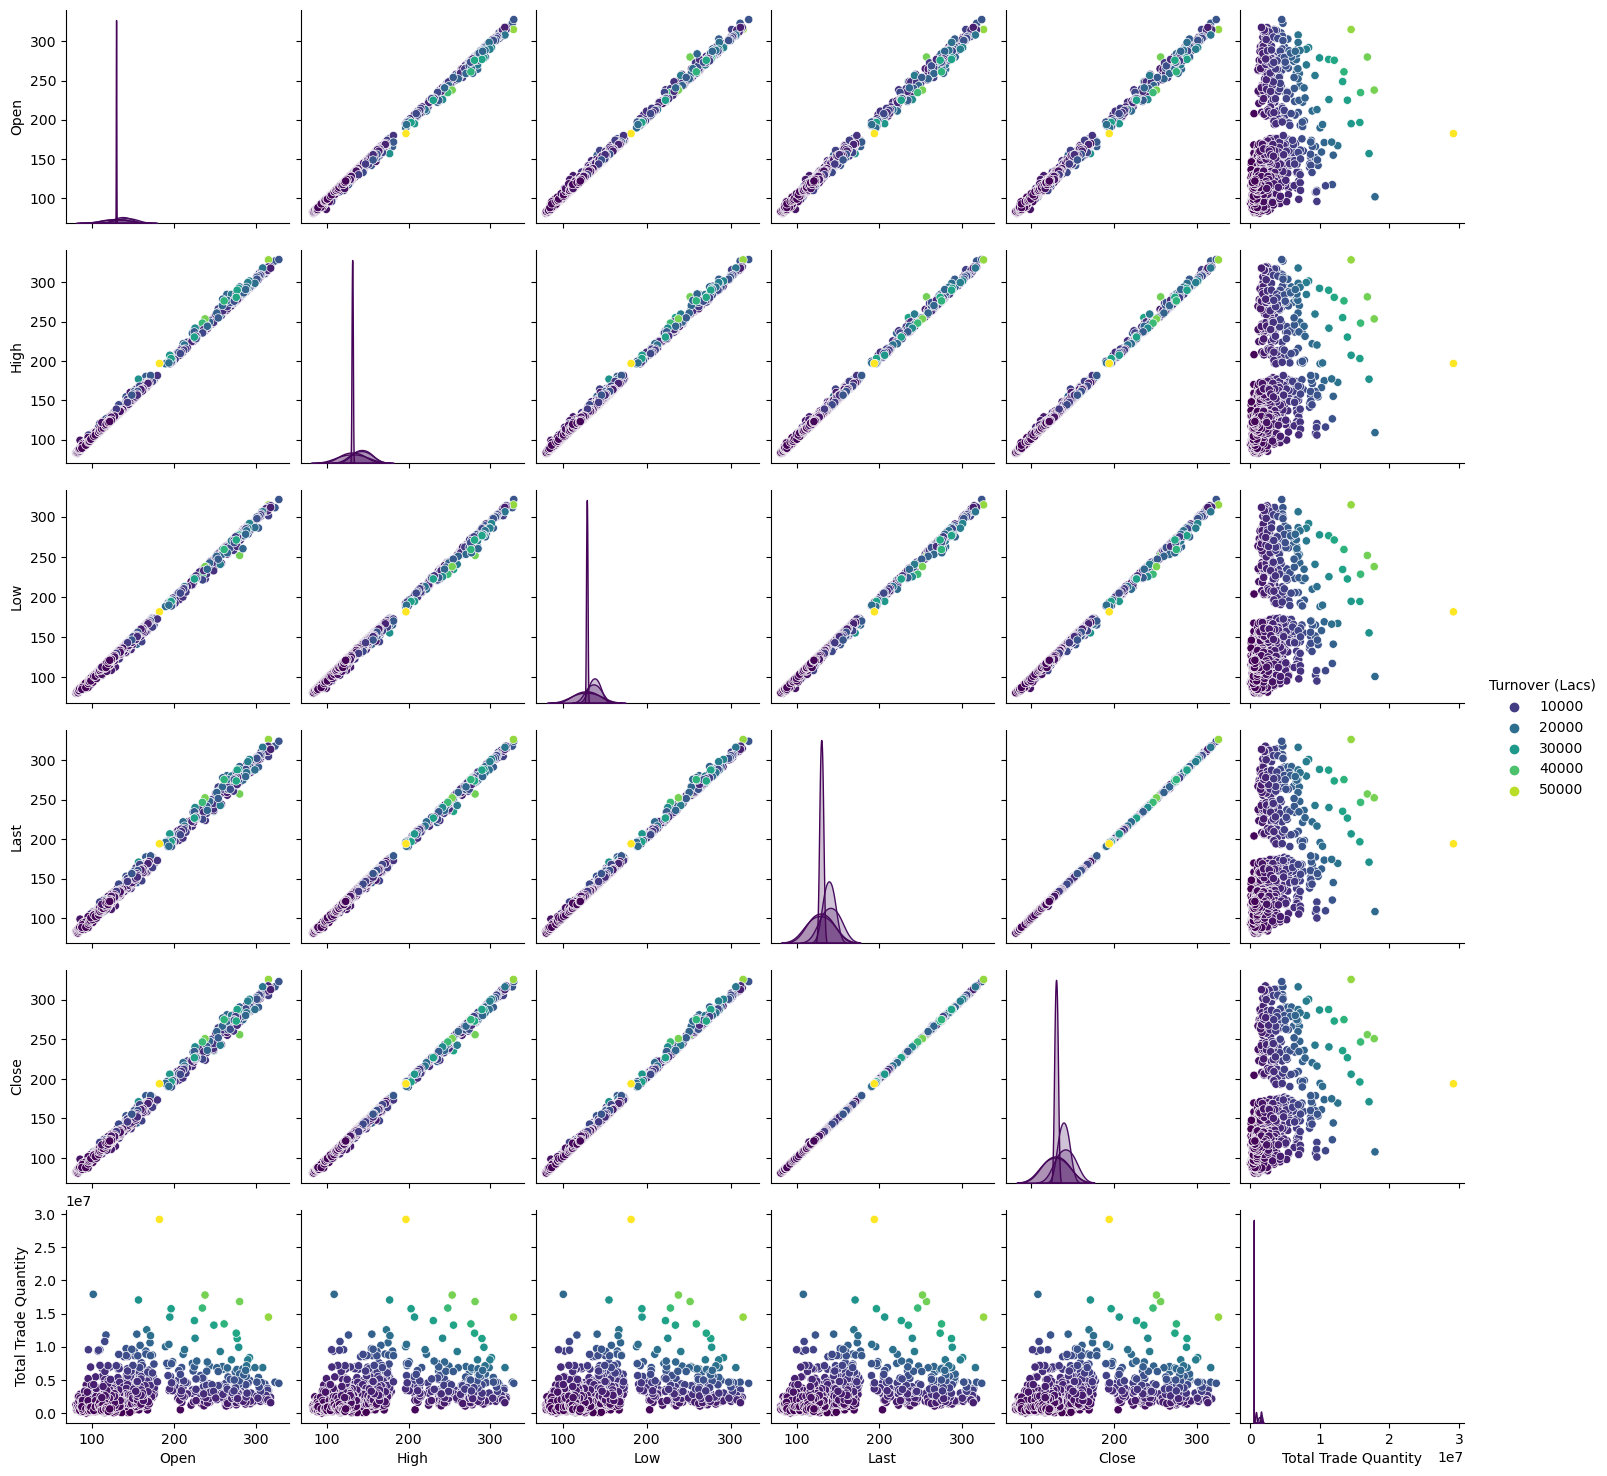

In [6]:
sns.pairplot(stockdata_df, hue='Turnover (Lacs)', palette="viridis")
plt.show()

In [7]:
df_close=stockdata_df.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

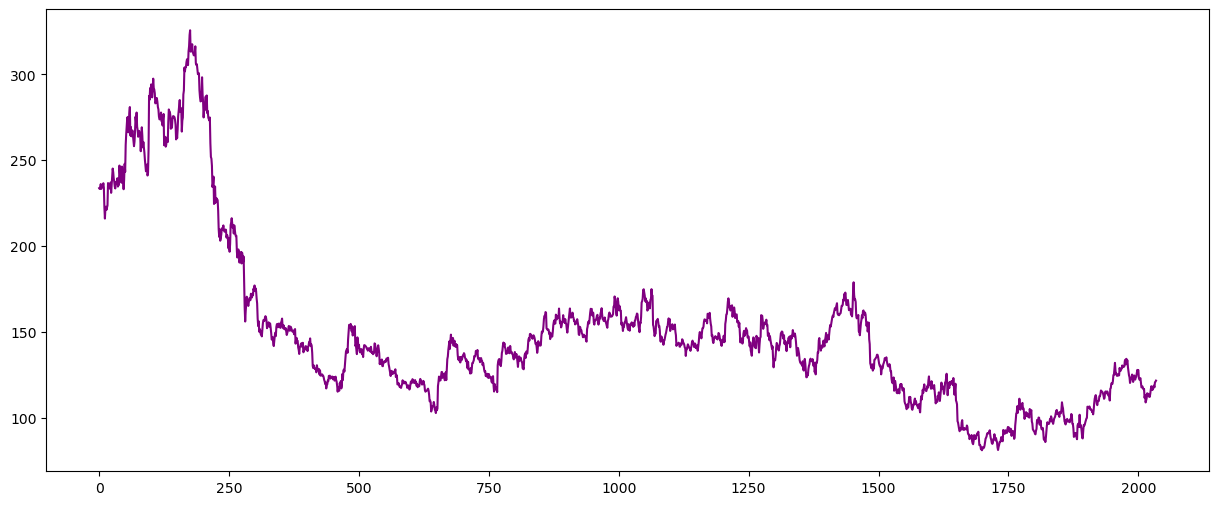

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(df_close, c="purple")
plt.show()

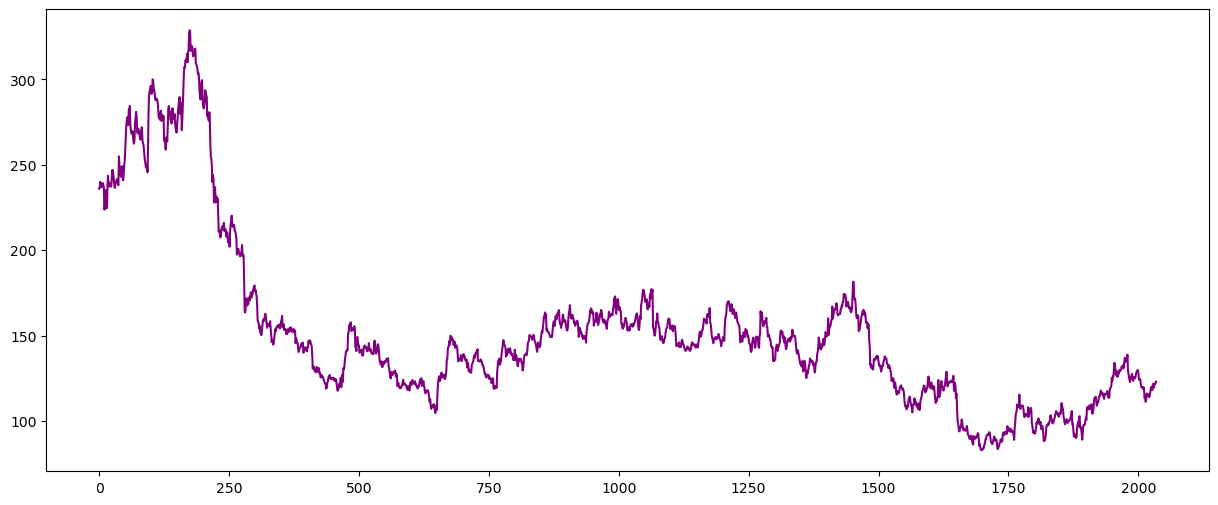

In [9]:
plt.figure(figsize=(15,6))

df_high=stockdata_df.reset_index()['High']
plt.plot(df_high, c="purple")
plt.show()

In [10]:
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [11]:
df_high.shape

(2035, 1)

In [12]:
print(df_high)

[[0.62268754]
 [0.62614353]
 [0.6391543 ]
 ...
 [0.15917869]
 [0.15938199]
 [0.16344786]]


In [13]:
training_size = int(len(df_high) * 0.65)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [14]:
training_size,test_size

(1322, 713)

In [15]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [18]:
print(x_train.shape), print(y_train.shape)

(1221, 100, 1)
(1221,)


(None, None)

In [19]:
print(x_test.shape), print(y_test.shape)

(612, 100, 1)
(612,)


(None, None)

In [20]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train , validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose=1)

Epoch 1/100
20/20 [==============================] - 22s 408ms/step - loss: 0.0307 - val_loss: 0.0043
Epoch 2/100
20/20 [==============================] - 6s 325ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 3/100
20/20 [==============================] - 6s 311ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 6s 313ms/step - loss: 0.0015 - val_loss: 9.2901e-04
Epoch 5/100
20/20 [==============================] - 6s 306ms/step - loss: 0.0014 - val_loss: 9.4914e-04
Epoch 6/100
20/20 [==============================] - 6s 284ms/step - loss: 0.0013 - val_loss: 9.8757e-04
Epoch 7/100
20/20 [==============================] - 6s 293ms/step - loss: 0.0013 - val_loss: 9.5729e-04
Epoch 8/100
20/20 [==============================] - 6s 281ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/100
20/20 [==============================] - 6s 281ms/step - loss: 0.0012 - val_loss: 9.3353e-04
Epoch 10/100
20/20 [==============================] - 6s 310ms/step - 

20/20 [==============================] - 6s 290ms/step - loss: 4.0495e-04 - val_loss: 4.6551e-04
Epoch 77/100
20/20 [==============================] - 5s 274ms/step - loss: 4.2230e-04 - val_loss: 3.0092e-04
Epoch 78/100
20/20 [==============================] - 4s 220ms/step - loss: 4.1124e-04 - val_loss: 4.8332e-04
Epoch 79/100
20/20 [==============================] - 5s 251ms/step - loss: 4.2230e-04 - val_loss: 3.6324e-04
Epoch 80/100
20/20 [==============================] - 5s 231ms/step - loss: 3.5769e-04 - val_loss: 4.3147e-04
Epoch 81/100
20/20 [==============================] - 5s 262ms/step - loss: 3.5062e-04 - val_loss: 3.4542e-04
Epoch 82/100
20/20 [==============================] - 5s 268ms/step - loss: 3.3342e-04 - val_loss: 2.9488e-04
Epoch 83/100
20/20 [==============================] - 6s 276ms/step - loss: 3.4192e-04 - val_loss: 3.1944e-04
Epoch 84/100
20/20 [==============================] - 5s 272ms/step - loss: 3.1473e-04 - val_loss: 2.7870e-04
Epoch 85/100
20/20 [===

In [24]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
math.sqrt(mean_squared_error(y_train, train_predict))

169.12003287102468

In [27]:
math.sqrt(mean_squared_error(y_test, test_predict))

118.38508725095954

In [28]:
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

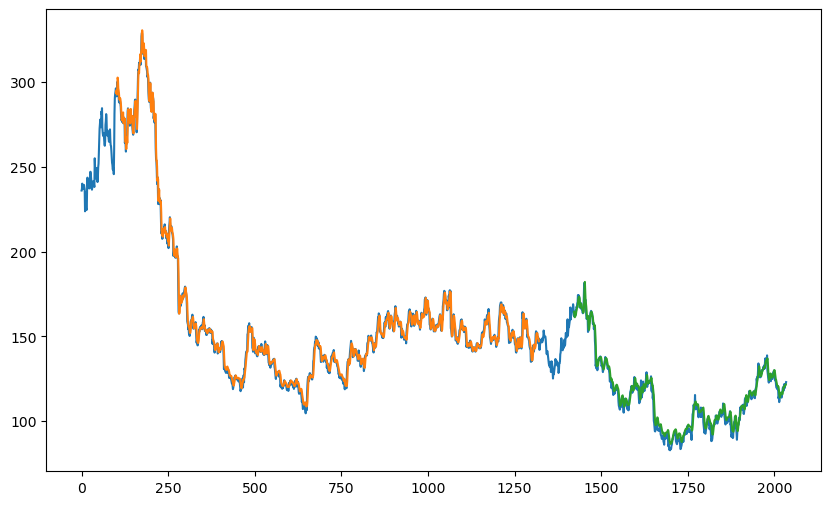

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [29]:
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [30]:
len(test_data), x_test.shape

(713, (612, 100, 1))

In [31]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 304)

In [33]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
nextNumberOfDays = 28
i = 0

while i < nextNumberOfDays:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


0 day input [0.1345802  0.13254727 0.13397032 0.13356373 0.13498679 0.14108559
 0.13498679 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778
 0.15003049 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546
 0.19129904 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727
 0.17483228 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892
 0.18987599 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832
 0.20349665 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766
 0.21589754 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923
 0.16751372 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426
 0.16853019 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959
 0.17767839 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012
 0.17015654 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049
 0.15064037 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553
 0.12827811 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469
 0.13295385 0.12807481 0.12624517 0.13051433 0.13905

7 day output [[0.17178202]]
8 day input [0.12685505 0.12482212 0.14515145 0.1467778  0.15003049 0.15368977
 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904 0.20817239
 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228 0.17849156
 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599 0.19028258
 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665 0.19597479
 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754 0.21610083
 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372 0.1622281
 0.17056312 0.17462899 0.17930474 0.18174426 0.16853019 0.16548079
 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839 0.18459036
 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654 0.16751372
 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037 0.14860744
 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811 0.11547062
 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385 0.12807481
 0.12624517 0.13051433 0.13905265 0.14718439 0.15104696 0.14515145
 0.14311852 0.15816223 

15 day output [[0.18049437]]
16 day input [0.17625534 0.17564546 0.19129904 0.20817239 0.20309006 0.18479366
 0.17930474 0.1896727  0.17483228 0.17849156 0.17645863 0.18540354
 0.18377719 0.19190892 0.18987599 0.19028258 0.19394186 0.20004066
 0.19638138 0.19495832 0.20349665 0.19597479 0.21162838 0.22036999
 0.20979874 0.21528766 0.21589754 0.21610083 0.22748526 0.19150234
 0.1833706  0.17340923 0.16751372 0.1622281  0.17056312 0.17462899
 0.17930474 0.18174426 0.16853019 0.16548079 0.1742224  0.1713763
 0.17300264 0.17157959 0.17767839 0.18459036 0.18702988 0.18987599
 0.19109575 0.18581012 0.17015654 0.16751372 0.16974995 0.16609067
 0.15531612 0.15003049 0.15064037 0.14860744 0.14596463 0.15043708
 0.14413499 0.12441553 0.12827811 0.11547062 0.12034966 0.13478349
 0.13498679 0.12868469 0.13295385 0.12807481 0.12624517 0.13051433
 0.13905265 0.14718439 0.15104696 0.14515145 0.14311852 0.15816223
 0.15328319 0.14921732 0.15531612 0.15917869 0.15938199 0.16344786
 0.1627595  0.1646535

23 day output [[0.18836877]]
24 day input [0.17483228 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892
 0.18987599 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832
 0.20349665 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766
 0.21589754 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923
 0.16751372 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426
 0.16853019 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959
 0.17767839 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012
 0.17015654 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049
 0.15064037 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553
 0.12827811 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469
 0.13295385 0.12807481 0.12624517 0.13051433 0.13905265 0.14718439
 0.15104696 0.14515145 0.14311852 0.15816223 0.15328319 0.14921732
 0.15531612 0.15917869 0.15938199 0.16344786 0.1627595  0.16465355
 0.16606393 0.16728874 0.16844469 0.16956979 0.17067932 0.17178202
 0.1728832  0.173984

In [37]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [38]:
day_new.shape

(100,)

In [39]:
day_pred.shape

(28,)

In [40]:
ds3 = df_high.tolist()
ds3.extend(lst_output)
len(df_high)

2035

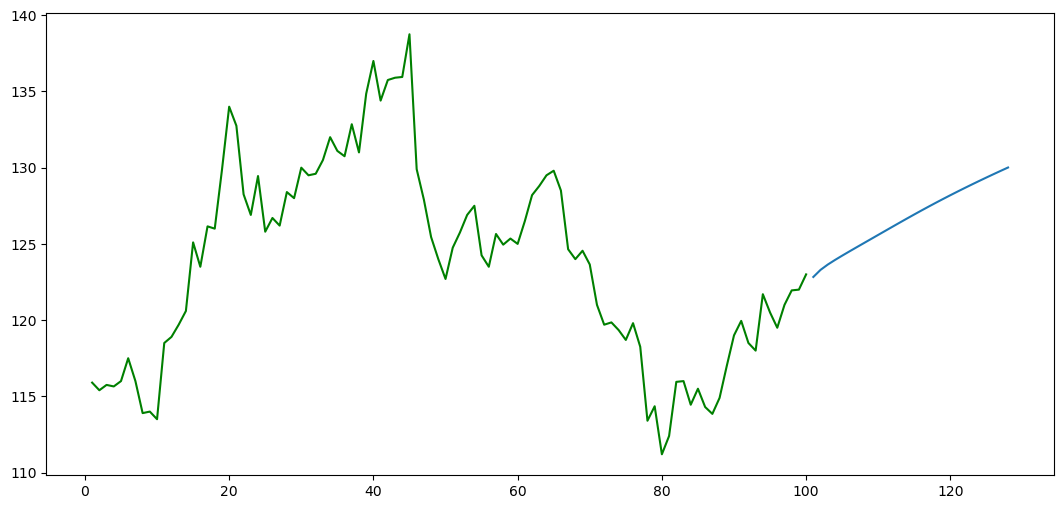

In [42]:
plt.figure(figsize=(13,6))

plt.plot(day_new, scaler.inverse_transform(df_high[1935:]),color="Green")
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

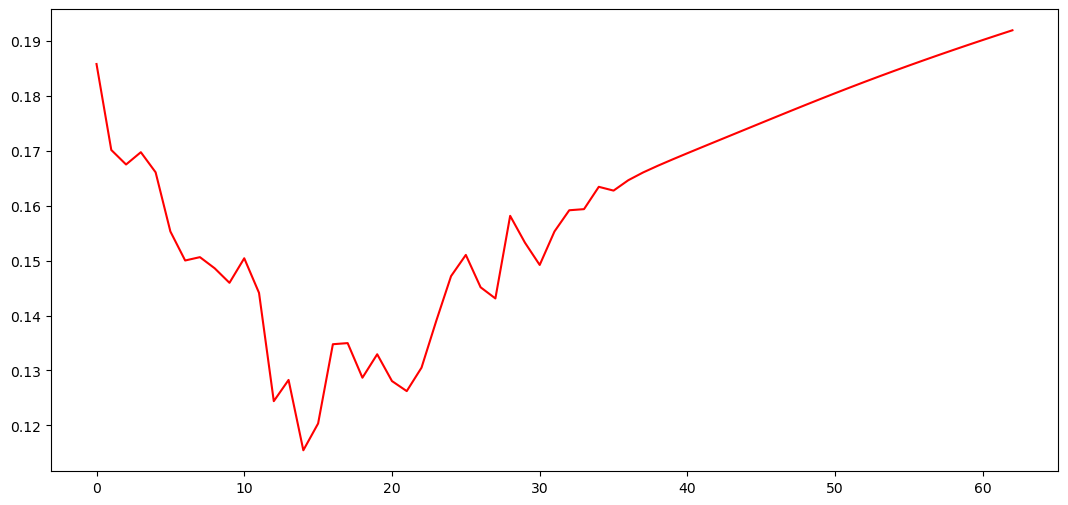

In [43]:
plt.figure(figsize=(13,6))

ds3=df_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000:],color='Red')
plt.show()

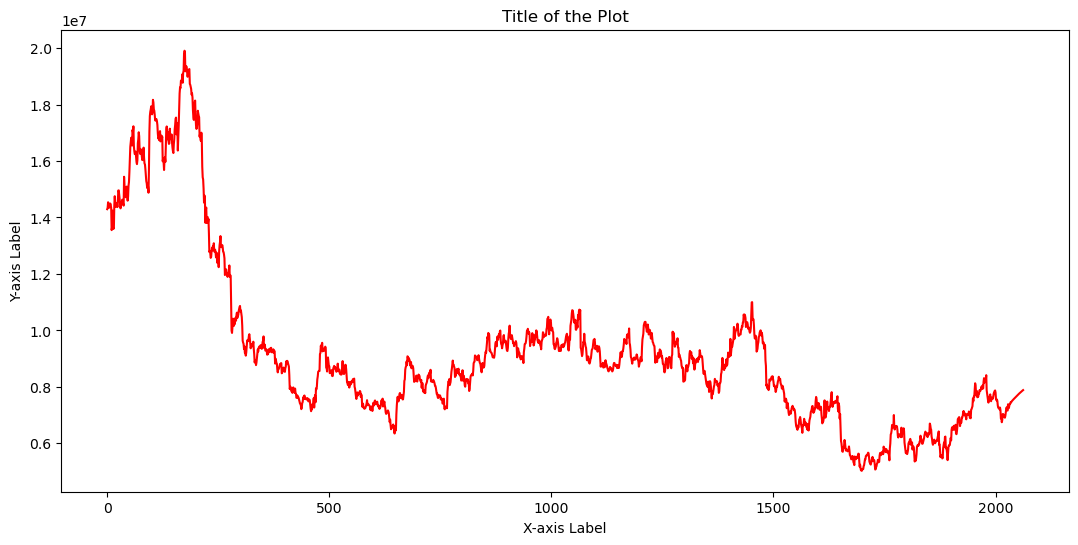

In [46]:
plt.figure(figsize=(13, 6))
ds3 = scaler.inverse_transform(ds3).tolist()
plt.plot(ds3, color='red')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()
